<a href="https://colab.research.google.com/github/domingues100/Resistor-Classification/blob/main/Resistor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Montando o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Create Dataseet

 ***creating dataset csv based on images inside folders***

In [ ]:
import os
import csv


diretorio_raiz = 'INPUT PATH'

arquivo_csv = "OUTPUT NAME"


with open(arquivo_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['ID', 'LABEL'])  #columns


    for pasta in os.listdir(diretorio_raiz):
        pasta_path = os.path.join(diretorio_raiz, pasta)


        if os.path.isdir(pasta_path):
            for imagem in os.listdir(pasta_path):
                if imagem.endswith('.jpg') or imagem.endswith('.png'):
                    csvwriter.writerow([imagem, pasta])


***Resinzing images***

In [ ]:
import os
import shutil
import cv2


diretorio_origem = "INPUT PATH"

diretorio_destino = "OUTPUT PATH"

tamanho_desejado = (224, 224) #size of the new images


pastas_origem = os.listdir(diretorio_origem)


if not os.path.exists(diretorio_destino):
    os.makedirs(diretorio_destino)


for pasta in pastas_origem:
    pasta_origem = os.path.join(diretorio_origem, pasta)


    if os.path.isdir(pasta_origem):
        for imagem in os.listdir(pasta_origem):
            imagem_origem = os.path.join(pasta_origem, imagem)

            if imagem.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
                img = cv2.imread(imagem_origem)
                img = cv2.resize(img, tamanho_desejado)
                imagem_destino = os.path.join(diretorio_destino, imagem)
                cv2.imwrite(imagem_destino, img)


# **Dataset Visualization**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Sist Inteligentes/archive/dataset2.csv')
distribuicao_classes = df['LABEL'].value_counts()
print(distribuicao_classes)

print(distribuicao_classes.sum())

10R     228
470R    216
1K      144
150R    140
33K     123
15R     115
100R    111
820R     98
180K     97
68K      95
220R     93
4K7      90
24K      89
5K61     87
620R     81
7K5      80
3R9K     80
5K1      78
270K     74
6R8      73
8K2      73
11M      72
2K2      62
1M       61
20K      57
27R      55
330R     51
220K     47
56K      47
22R      33
2R       28
Name: LABEL, dtype: int64
2778


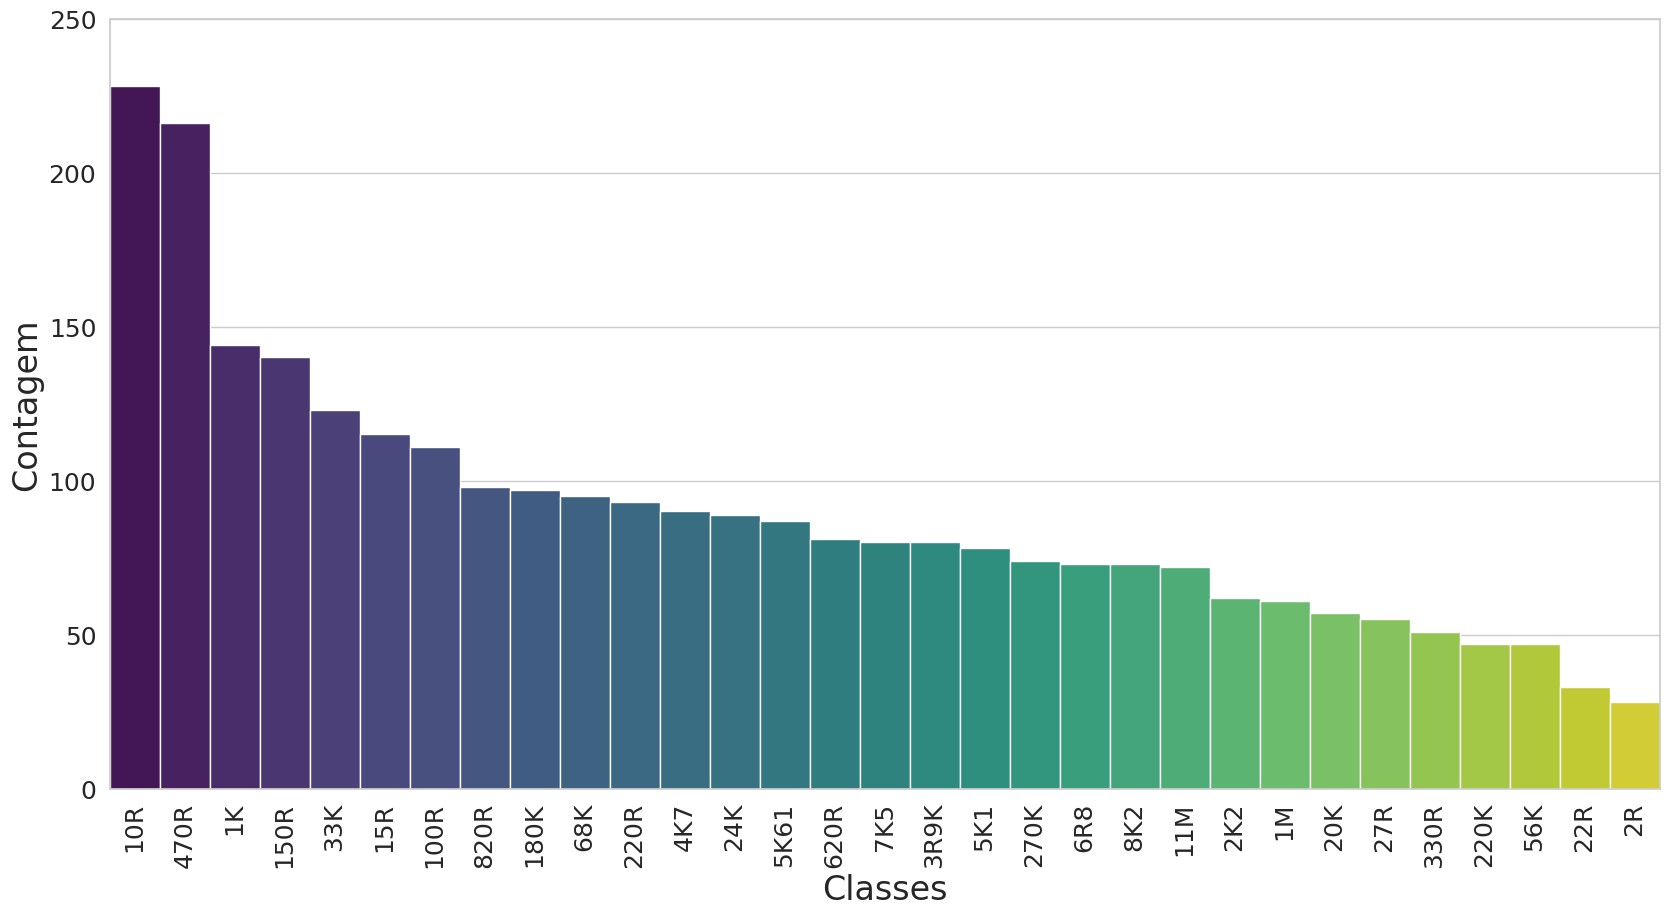

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo Seaborn
sns.set(style="whitegrid")

# Criação do gráfico de barras com Seaborn
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=distribuicao_classes.index, y=distribuicao_classes.values, palette="viridis", width=1)  # Ajuste o valor de width conforme necessário

# Adiciona rótulos e título
plt.xlabel('Classes', fontdict={'size': 24})
plt.ylabel('Contagem', fontdict={'size': 24})

# Ajusta o tamanho da fonte nos números dos eixos
plt.tick_params(axis='both', labelsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Ajusta o tamanho da fonte nos rótulos do eixo y
plt.yticks(fontsize=18)

# Diminui a altura do eixo y (ajuste conforme necessário)
ax.set_ylim(0, 250)  # Ajuste conforme necessário

# Salva o gráfico como um arquivo PDF
plt.savefig('grafico_classes.pdf', format='pdf')

# Exibe o gráfico
plt.show()


# TRAIN

In [ ]:
#necessary imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
import os
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Sist Inteligentes/archive/dataset2.csv')

Y = train_data[['LABEL']]

In [ ]:
#PLOT FUNCTION

import matplotlib.pyplot as plt

def plot_acc_model(acc, val_acc, epochs):
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()
    plt.show()

def plot_loss_model(loss, val_loss, epochs):
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.figure()
    plt.show()

# Treino 80% 10% 10%

***To train spliting 80% train, 10%validation, 10% test, run next cells***

Obs: inceptionv3 network

In [ ]:
import os
import gc
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub

# Configurações
PATH = "/content/drive/MyDrive/Sist Inteligentes/imagens_resize/"
csv_path = "/content/drive/MyDrive/Sist Inteligentes/archive/dataset2.csv"
IMG_SIZE = (299,299)
BATCH_SIZE = 32
EPOCHS = 10

# Carregar o arquivo CSV
df = pd.read_csv(csv_path)
df['LABEL'] = df['LABEL'].map(str)
train_y = df['LABEL']
train_x = df.drop(['LABEL'], axis=1)

x_train_df, x_temp, train_y, temp_y = train_test_split(train_x, train_y, test_size=0.20, random_state=42, stratify = train_y)
x_teste, x_val, teste_y, val_y = train_test_split(x_temp, temp_y, test_size=0.50, random_state=42, stratify=temp_y)

train_df = pd.concat([x_train_df, train_y], axis=1)
train_df['LABEL'] = train_df['LABEL'].astype(str)
train_df['ID'] = train_df['ID'].astype(str)

teste_df = pd.concat([x_teste, teste_y], axis=1)
teste_df['LABEL'] = teste_df['LABEL'].astype(str)
teste_df['ID'] = teste_df['ID'].astype(str)

val_df = pd.concat([x_val, val_y], axis=1)
val_df['LABEL'] = val_df['LABEL'].astype(str)
val_df['ID'] = val_df['ID'].astype(str)


In [ ]:
# Data augmentation
img_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale = 1./255.,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True)

# Initialize Data Generators
train_generator = img_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=PATH,
    x_col="ID",
    y_col="LABEL",
    class_mode="categorical",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_generator = img_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=PATH,
    x_col="ID",
    y_col="LABEL",
    class_mode="categorical",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_generator = img_datagen.flow_from_dataframe(
    dataframe=teste_df,
    directory=PATH,
    x_col="ID",
    y_col="LABEL",
    class_mode="categorical",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


model = keras.Sequential([
    keras.applications.InceptionV3(
        include_top=False,
        weights='imagenet',
        input_shape=(299, 299, 3),
    ),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation='relu'),  # Adiciona uma camada totalmente conectada com ativação ReLU
    keras.layers.Dense(31, activation='softmax')  # Adiciona a camada de saída com ativação softmax para 31 classes
])

# Compile the model
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)


# **STRATIFIED KFOLD INCEPTION**

***Next cells are for stratified kfold training method using inception network***

In [ ]:
save_path = '/content/drive/MyDrive/Sist Inteligentes/archive/'
PATH = "/content/drive/MyDrive/Sist Inteligentes/imagens_resize/"
IMG_SIZE = (299,299)
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

n = Y.size
fold_var = 1

#creats training and validation splits
for train_index, val_index in skf.split(np.zeros(n),Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  training_data.to_csv(f"{save_path}"+f"Train_Val_csvs/training_data{fold_var}.csv") #saves training_data in a csv
  validation_data.to_csv(f"{save_path}"+f"Train_Val_csvs/validation_data{fold_var}.csv") #saves validation_data in a csv
  fold_var+=1

In [ ]:
#Training with KFOLD

fold_var = 0
for fold_var in range(5): #5 folds

  #reading val and train csvs for each split
  validation_data = pd.read_csv(f"{save_path}"+f"Train_Val_csvs/validation_data{fold_var+1}.csv")
  training_data = pd.read_csv(f"{save_path}"+f"Train_Val_csvs/training_data{fold_var+1}.csv")
  validation_data['LABEL']=validation_data["LABEL"].values.astype(str)
  training_data['LABEL']=training_data["LABEL"].values.astype(str)
  validation_data['ID']=validation_data["ID"].values.astype(str)
  training_data['ID']=training_data["ID"].values.astype(str)

 #data generator
  img_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale = 1./255.,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True)

  # Initialize Data Generators
  train_generator = img_datagen.flow_from_dataframe(
      dataframe=training_data,
      directory=PATH,
      x_col="ID",
      y_col="LABEL",
      class_mode="categorical",
      target_size=IMG_SIZE,
      batch_size=BATCH_SIZE
  )

  val_generator = img_datagen.flow_from_dataframe(
      dataframe=validation_data,
      directory=PATH,
      x_col="ID",
      y_col="LABEL",
      class_mode="categorical",
      target_size=IMG_SIZE,
      batch_size=BATCH_SIZE,
      shuffle=False
  )

  #initialize model
  model = keras.Sequential([
      keras.applications.InceptionV3(
          include_top=False,
          weights='imagenet',
          input_shape=(299, 299, 3),),
      keras.layers.GlobalAveragePooling2D(),
      keras.layers.Dense(1024, activation='relu'),  # fully conected ReLU
      keras.layers.Dense(31, activation='softmax')  # output layer with softmax activation for 31 classes
  ])

  # Compile the model
  optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-4)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(
    x = train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
  )

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plot_acc_model(acc, val_acc, epochs)
  plot_loss_model(loss, val_loss, epochs)


  #save each model
  model.save("/content/drive/MyDrive/Sist Inteligentes/archive/"+f"Train_Val_csvs/kfold{fold_var+1}.h5")



# **STRATIFIED KFOLD RESNETV250**

***Next cells are for stratified kfold training method using resnet network***

In [ ]:
save_path = '/content/drive/MyDrive/Sist Inteligentes/archive/'
PATH = "/content/drive/MyDrive/Sist Inteligentes/imagens_resize224/"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
gc.collect()

Found 2222 validated image filenames belonging to 31 classes.
Found 556 validated image filenames belonging to 31 classes.
94668760/94668760 [==============================] - 1s 0us/step
Epoch 1/10
70/70 [==============================] - 762s 10s/step - loss: 2.9307 - accuracy: 0.1742 - val_loss: 2.6832 - val_accuracy: 0.2518
Epoch 2/10
70/70 [==============================] - 51s 735ms/step - loss: 1.9437 - accuracy: 0.4140 - val_loss: 2.2383 - val_accuracy: 0.3885
Epoch 3/10
70/70 [==============================] - 54s 775ms/step - loss: 1.4190 - accuracy: 0.5608 - val_loss: 1.9354 - val_accuracy: 0.4191
Epoch 4/10
70/70 [==============================] - 52s 741ms/step - loss: 1.1054 - accuracy: 0.6382 - val_loss: 1.5526 - val_accuracy: 0.5594
Epoch 5/10
70/70 [==============================] - 52s 737ms/step - loss: 0.9006 - accuracy: 0.7057 - val_loss: 1.4097 - val_accuracy: 0.5701
Epoch 6/10
70/70 [==============================] - 52s 742ms/step - loss: 0.7388 - accuracy: 0.76

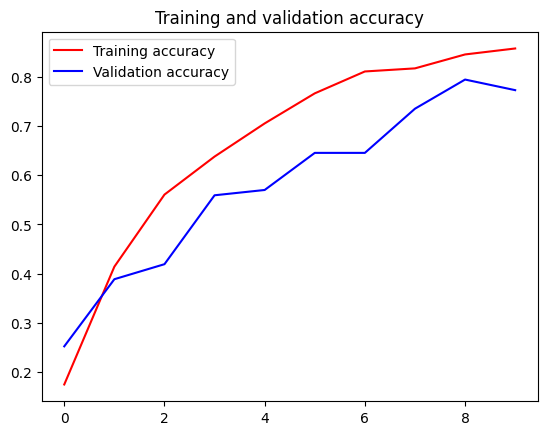

<Figure size 640x480 with 0 Axes>

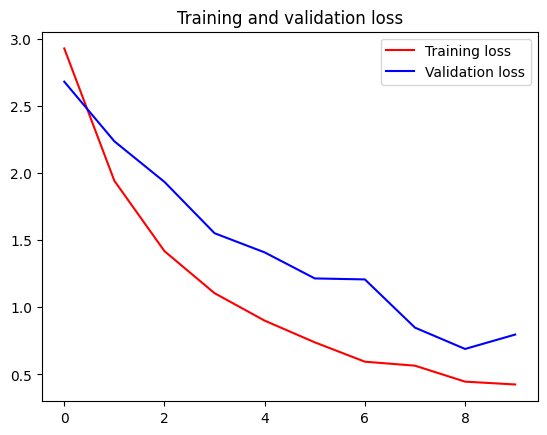

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 2222 validated image filenames belonging to 31 classes.
Found 556 validated image filenames belonging to 31 classes.
Epoch 1/10
70/70 [==============================] - 96s 796ms/step - loss: 2.8381 - accuracy: 0.2052 - val_loss: 2.6456 - val_accuracy: 0.2392
Epoch 2/10
70/70 [==============================] - 53s 763ms/step - loss: 1.8958 - accuracy: 0.4181 - val_loss: 2.0428 - val_accuracy: 0.3759
Epoch 3/10
70/70 [==============================] - 54s 775ms/step - loss: 1.3841 - accuracy: 0.5608 - val_loss: 1.8416 - val_accuracy: 0.4640
Epoch 4/10
70/70 [==============================] - 53s 753ms/step - loss: 1.1168 - accuracy: 0.6535 - val_loss: 1.4086 - val_accuracy: 0.5629
Epoch 5/10
70/70 [==============================] - 53s 752ms/step - loss: 0.8266 - accuracy: 0.7340 - val_loss: 1.4966 - val_accuracy: 0.5540
Epoch 6/10
70/70 [==============================] - 51s 729ms/step - loss: 0.7747 - accuracy: 0.7412 - val_loss: 1.0194 - val_accuracy: 0.6871
Epoch 7/10
70/70 [=

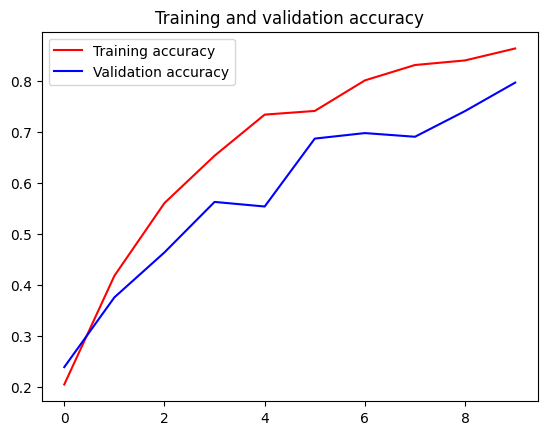

<Figure size 640x480 with 0 Axes>

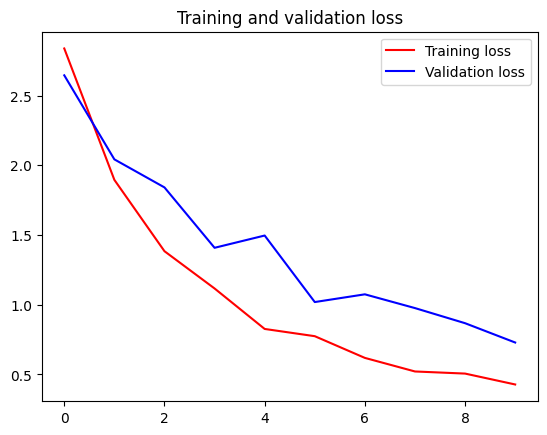

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 2222 validated image filenames belonging to 31 classes.
Found 556 validated image filenames belonging to 31 classes.
Epoch 1/10
70/70 [==============================] - 93s 786ms/step - loss: 2.8905 - accuracy: 0.1913 - val_loss: 2.7252 - val_accuracy: 0.2752
Epoch 2/10
70/70 [==============================] - 52s 740ms/step - loss: 1.8702 - accuracy: 0.4451 - val_loss: 2.1187 - val_accuracy: 0.4011
Epoch 3/10
70/70 [==============================] - 51s 734ms/step - loss: 1.3598 - accuracy: 0.5761 - val_loss: 1.7563 - val_accuracy: 0.4658
Epoch 4/10
70/70 [==============================] - 51s 725ms/step - loss: 0.9972 - accuracy: 0.6940 - val_loss: 1.3820 - val_accuracy: 0.5773
Epoch 5/10
70/70 [==============================] - 51s 734ms/step - loss: 0.8282 - accuracy: 0.7399 - val_loss: 0.9948 - val_accuracy: 0.6906
Epoch 6/10
70/70 [==============================] - 51s 733ms/step - loss: 0.6551 - accuracy: 0.7849 - val_loss: 1.5276 - val_accuracy: 0.5612
Epoch 7/10
70/70 [=

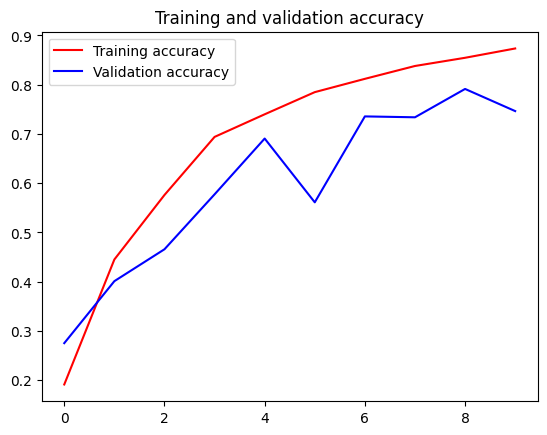

<Figure size 640x480 with 0 Axes>

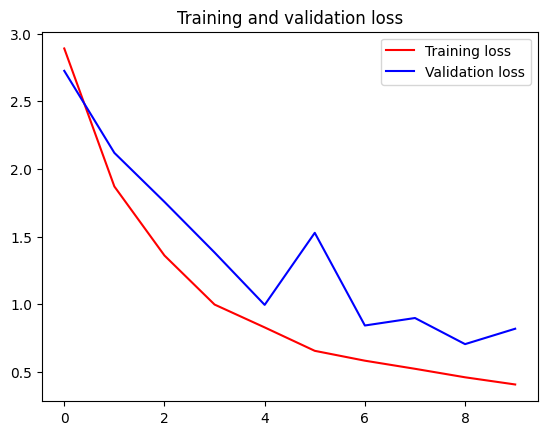

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 2223 validated image filenames belonging to 31 classes.
Found 555 validated image filenames belonging to 31 classes.
Epoch 1/10
70/70 [==============================] - 92s 766ms/step - loss: 2.9019 - accuracy: 0.1934 - val_loss: 2.8509 - val_accuracy: 0.2432
Epoch 2/10
70/70 [==============================] - 54s 767ms/step - loss: 1.9404 - accuracy: 0.4062 - val_loss: 2.0665 - val_accuracy: 0.3730
Epoch 3/10
70/70 [==============================] - 52s 741ms/step - loss: 1.4064 - accuracy: 0.5578 - val_loss: 1.8643 - val_accuracy: 0.4721
Epoch 4/10
70/70 [==============================] - 51s 731ms/step - loss: 1.0725 - accuracy: 0.6527 - val_loss: 1.4960 - val_accuracy: 0.5640
Epoch 5/10
70/70 [==============================] - 51s 727ms/step - loss: 0.8980 - accuracy: 0.7072 - val_loss: 1.2641 - val_accuracy: 0.6144
Epoch 6/10
70/70 [==============================] - 54s 773ms/step - loss: 0.7030 - accuracy: 0.7710 - val_loss: 1.1261 - val_accuracy: 0.6703
Epoch 7/10
70/70 [=

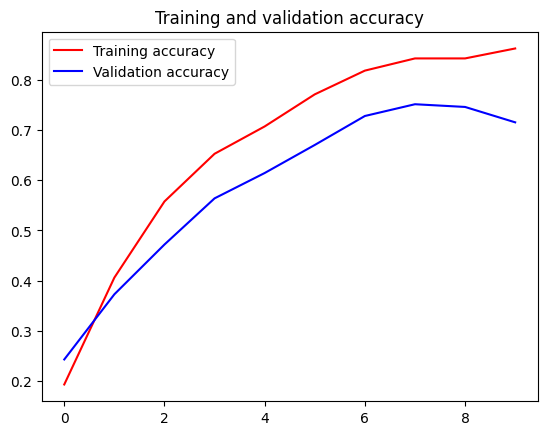

<Figure size 640x480 with 0 Axes>

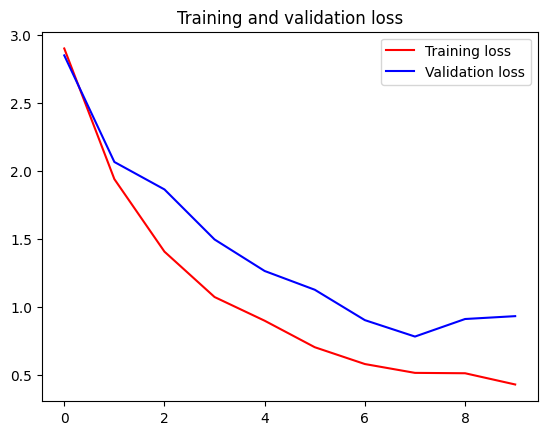

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 2223 validated image filenames belonging to 31 classes.
Found 555 validated image filenames belonging to 31 classes.
Epoch 1/10
70/70 [==============================] - 91s 741ms/step - loss: 2.8998 - accuracy: 0.1939 - val_loss: 2.7249 - val_accuracy: 0.2541
Epoch 2/10
70/70 [==============================] - 51s 726ms/step - loss: 1.9708 - accuracy: 0.4112 - val_loss: 2.0456 - val_accuracy: 0.3730
Epoch 3/10
70/70 [==============================] - 51s 731ms/step - loss: 1.4183 - accuracy: 0.5619 - val_loss: 1.6251 - val_accuracy: 0.4919
Epoch 4/10
70/70 [==============================] - 52s 734ms/step - loss: 1.0394 - accuracy: 0.6685 - val_loss: 1.4642 - val_accuracy: 0.5874
Epoch 5/10
70/70 [==============================] - 52s 742ms/step - loss: 0.8069 - accuracy: 0.7418 - val_loss: 1.2213 - val_accuracy: 0.6018
Epoch 6/10
70/70 [==============================] - 54s 773ms/step - loss: 0.6805 - accuracy: 0.7836 - val_loss: 1.1788 - val_accuracy: 0.6378
Epoch 7/10
70/70 [=

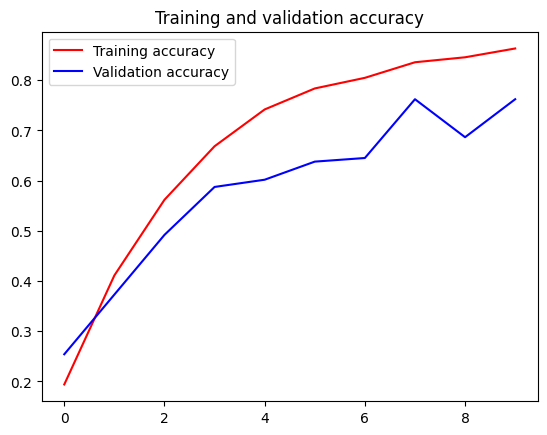

<Figure size 640x480 with 0 Axes>

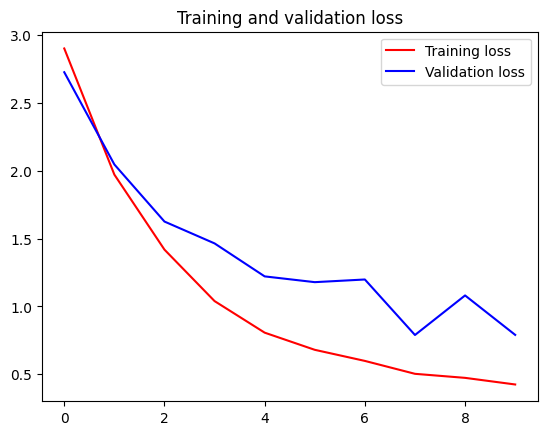

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Training with KFOLD

fold_var = 0
for fold_var in range(5): #5 folds

  #reading val and train csvs for each split
  validation_data = pd.read_csv(f"{save_path}"+f"Train_Val_csvs/Resultados Teste 1 /validation_data{fold_var+1}.csv")
  training_data = pd.read_csv(f"{save_path}"+f"Train_Val_csvs/Resultados Teste 1 /training_data{fold_var+1}.csv")
  validation_data['LABEL']=validation_data["LABEL"].values.astype(str)
  training_data['LABEL']=training_data["LABEL"].values.astype(str)
  validation_data['ID']=validation_data["ID"].values.astype(str)
  training_data['ID']=training_data["ID"].values.astype(str)

 #data generator
  img_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale = 1./255.,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True)

  # Initialize Data Generators
  train_generator = img_datagen.flow_from_dataframe(
      dataframe=training_data,
      directory=PATH,
      x_col="ID",
      y_col="LABEL",
      class_mode="categorical",
      target_size=IMG_SIZE,
      batch_size=BATCH_SIZE,
      shuffle=True
  )

  val_generator = img_datagen.flow_from_dataframe(
      dataframe=validation_data,
      directory=PATH,
      x_col="ID",
      y_col="LABEL",
      class_mode="categorical",
      target_size=IMG_SIZE,
      batch_size=BATCH_SIZE,
      shuffle=False
  )


  model = keras.Sequential([
      keras.applications.ResNet50V2(
          include_top=False,
          input_shape=(224, 224, 3)),
          keras.layers.GlobalAveragePooling2D(),  # fully conected ReLU
          keras.layers.Dense(1024, activation='relu'),
          keras.layers.Dense(31, activation='softmax')  # output layer with softmax activation for 31 classes
  ])


  optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-4)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(
    x = train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
  )

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plot_acc_model(acc, val_acc, epochs)
  plot_loss_model(loss, val_loss, epochs)

  #save each model
  model.save("/content/drive/MyDrive/Sist Inteligentes/archive/"+f"Train_Val_csvs/Resultados teste 4/kfold{fold_var+1}.h5")
  gc.collect()

# **STRATIFIED KFOLD EFFICIENT NET**

***Next cells are for stratified kfold training method using effnet network***

In [ ]:
save_path = '/content/drive/MyDrive/Sist Inteligentes/archive/'
PATH = "/content/drive/MyDrive/Sist Inteligentes/imagens_resize384/"
IMG_SIZE = (384, 384)
BATCH_SIZE = 16
EPOCHS = 10

In [ ]:
gc.collect()

18

In [ ]:
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)


import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

#Training with KFOLD

fold_var = 0
for fold_var in range(5): #5 folds

  #reading val and train csvs for each split
  validation_data = pd.read_csv(f"{save_path}"+f"Train_Val_csvs/Resultados Teste 1 /validation_data{fold_var+1}.csv")
  training_data = pd.read_csv(f"{save_path}"+f"Train_Val_csvs/Resultados Teste 1 /training_data{fold_var+1}.csv")
  validation_data['LABEL']=validation_data["LABEL"].values.astype(str)
  training_data['LABEL']=training_data["LABEL"].values.astype(str)
  validation_data['ID']=validation_data["ID"].values.astype(str)
  training_data['ID']=training_data["ID"].values.astype(str)

 #data generator
  img_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale = 1./255.,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True)

  # Initialize Data Generators
  train_generator = img_datagen.flow_from_dataframe(
      dataframe=training_data,
      directory=PATH,
      x_col="ID",
      y_col="LABEL",
      class_mode="categorical",
      target_size=IMG_SIZE,
      batch_size=BATCH_SIZE
  )

  val_generator = img_datagen.flow_from_dataframe(
      dataframe=validation_data,
      directory=PATH,
      x_col="ID",
      y_col="LABEL",
      class_mode="categorical",
      target_size=IMG_SIZE,
      batch_size=BATCH_SIZE,
      shuffle=False
  )

  #initialize model
  # model = keras.Sequential([
  #     keras.applications.EfficientNetV2S(
  #         include_top=False,
  #         weights='imagenet',
  #         input_shape=(299, 299, 3),),
  #     keras.layers.GlobalAveragePooling2D(),  # fully conected ReLU
  #     keras.layers.Dense(1024, activation='relu'),
  #     keras.layers.Dense(31, activation='softmax')  # output layer with softmax activation for 31 classes
  # ])

  model = keras.Sequential([
      keras.applications.EfficientNetV2L(
          include_top=False,
          weights='imagenet',
          input_shape=(384, 384, 3),),
      keras.layers.GlobalAveragePooling2D(),  # fully conected ReLU
      keras.layers.Dense(1024, activation='relu'),
      keras.layers.Dense(31, activation='softmax')  # output layer with softmax activation for 31 classes
  ])


  optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-4)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(
    x = train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
  )

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  plot_acc_model(acc, val_acc, epochs)
  plot_loss_model(loss, val_loss, epochs)

  #save each model
  model.save("/content/drive/MyDrive/Sist Inteligentes/archive/"+f"Train_Val_csvs/Resultados teste 3/kfold{fold_var+1}.h5")
  gc.collect()

# PLots e métricas

Just run next cell if it wasnt runned before

In [ ]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale = 1./255.,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True)

model = keras.Sequential([
      keras.applications.InceptionV3(
          include_top=False,
          weights='imagenet',
          input_shape=(299, 299, 3),),
      keras.layers.GlobalAveragePooling2D(),
      keras.layers.Dense(1024, activation='relu'),  # fully conected ReLU
      keras.layers.Dense(31, activation='softmax')  # output layer with softmax activation for 31 classes
  ])

PATH = "/content/drive/MyDrive/Sist Inteligentes/imagens_resize/"

IMG_SIZE = (299,299)
BATCH_SIZE = 32
EPOCHS = 10

87910968/87910968 [==============================] - 1s 0us/step


***sklearn function***

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statistics
import glob
from sklearn.metrics import classification_report

***load weights and make predctions for each k in k fold***



In [ ]:

for k in range(5):
  validation_data = pd.read_csv("/content/drive/MyDrive/Sist Inteligentes/archive/"+f"Train_Val_csvs/Resultados Teste 1 /validation_data{k+1}.csv")

  val_generator = img_datagen.flow_from_dataframe(
      dataframe=validation_data,
      directory=PATH,
      x_col="ID",
      y_col="LABEL",
      class_mode="categorical",
      target_size=IMG_SIZE,
      batch_size=BATCH_SIZE,
      shuffle=False
  )

  model.load_weights(f"/content/drive/MyDrive/Sist Inteligentes/archive/"+f"Train_Val_csvs/Resultados teste 4/kfold{k+1}.h5")

  pred = model.predict(val_generator)
  predicted = np.argmax(pred,axis=1)

  classe_para_indice = val_generator.class_indices
  indice_para_classe = {v: k for k, v in classe_para_indice.items()}

  predicted_classes_nomes = [indice_para_classe[indice] for indice in predicted]

  for itens in validation_data:
    val_data = validation_data["LABEL"] .values.tolist()


  dados = {"PRED": predicted_classes_nomes, "LABEL": val_data}
  df = pd.DataFrame(dados)

  df.to_csv(f"/content/drive/MyDrive/Sist Inteligentes/archive/Train_Val_csvs/Resultados teste 4/"+f"df{k+1}.csv")

Found 556 validated image filenames belonging to 31 classes.
18/18 [==============================] - 12s 644ms/step
Found 556 validated image filenames belonging to 31 classes.
18/18 [==============================] - 13s 738ms/step
Found 556 validated image filenames belonging to 31 classes.
18/18 [==============================] - 9s 510ms/step
Found 555 validated image filenames belonging to 31 classes.
18/18 [==============================] - 10s 540ms/step
Found 555 validated image filenames belonging to 31 classes.
18/18 [==============================] - 8s 419ms/step


***Join the csvs and generate the classification report***



*   PRECISION
*   RECALL
*   F1-SCORE


In [ ]:
gc.collect()

43

In [ ]:
path = r'PATH CSVS'

csv_files = glob.glob(path + '*.csv')

print(csv_files)
for file in csv_files:
    df = pd.read_csv(file)
    merged_df = pd.concat([merged_df, df[['PRED', 'LABEL']]], ignore_index=True)

# Salva o arquivo unido
merged_df.to_csv('PATH OUTPUT CSV', index=False)


In [ ]:
df = pd.read_csv('READ PATH OUTPUT CSV')
true_label = df['LABEL'].tolist()
predicted_classes = df['PRED'].tolist()

print(classification_report(true_label, predicted_classes))